In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import models as models
import activations as activations
import optimizers as optimizers
import losses as losses
import metrics as metrics
import layers as layers
import regularizers as regularizers
from keras.datasets import cifar10
import time

Using TensorFlow backend.


In [2]:
#ok funciona bien
#funcion que hace reshape de las imagenes
#sin agregar el bias
def reshapeImages(x,y):
    im_shape = x.shape[1:]
    x = np.reshape(x,(x.shape[0],np.prod(im_shape)))
    return x,y

In [18]:
#IMPORTO LAS IMAGENES DE CIFAR, LES HAGO EL RESHAPE DE LOS X_TRAIN Y X_TEST
(x_train,y_train),(x_test,y_test) = cifar10.load_data() #x = images #y = categories #loading data
x_train,y_train = reshapeImages(x_train,y_train)
x_test,y_test = reshapeImages(x_test,y_test)
#PREPROCESADO DE LOS DATOS
x_train = (x_train - np.mean(x_train,axis=0))
x_test = (x_test - np.mean(x_train,axis=0))
y_train = y_train.flatten()
y_test = y_test.flatten()
n_clases = 10
yy_train = np.zeros([x_train.shape[0],n_clases])
yy_test = np.zeros([x_test.shape[0],n_clases])
yy_train[np.arange(x_train.shape[0]),y_train] = 1
yy_test[np.arange(x_test.shape[0]),y_test] = 1
#CREO EL MODELO Y VEO COMO PREDICE
layer_1 = layers.Dense(100,activations.Sigmoid(),1e-4,x_train.shape[1]) #capa 1
layer_2 = layers.Dense(100,activations.Sigmoid(),1e-4) #capa 2
layer_3 = layers.Dense(10,activations.Linear(),1e-2) #capa 3, ultima capa
model = models.Network()
model.add(layer_1)
#model.add(layer_2)
model.add(layer_3)
epocas = 200 #cantidad de epocas a realizar
lr = 3e-7 #learning rate
rg = 1e-2
bs = 200 #batch size
start = time.time()
loss_tr,loss_ts,acc_tr,acc_ts = model.fit(x_train,yy_train,x_test,yy_test,lr,epocas,bs,metrics.accuracy,losses.MSE,optimizers.SGD,regularizers.L2,rg)
end = time.time()
print(end-start)

epoch: 0
training data:  0.9065697224627052 0.27084
testing data:  0.9366090481292403 0.1189
epoch: 1
training data:  0.8608192293242101 0.30664
testing data:  0.8935760692937281 0.1468
epoch: 2
training data:  0.8451349323786053 0.3251
testing data:  0.8770457706844073 0.1631
epoch: 3
training data:  0.8369785969330762 0.33918
testing data:  0.8713109803266406 0.1704
epoch: 4
training data:  0.8313165796288622 0.34782
testing data:  0.8652669888755431 0.1849
epoch: 5
training data:  0.8267408087590077 0.35576
testing data:  0.8622354904100555 0.1966
epoch: 6
training data:  0.8227632221485656 0.36178
testing data:  0.856872164605301 0.2131
epoch: 7
training data:  0.8192415479005168 0.36556
testing data:  0.8517402211777726 0.2319
epoch: 8
training data:  0.8160487326965293 0.37022
testing data:  0.8483632514398711 0.2417
epoch: 9
training data:  0.8131478263872467 0.3749
testing data:  0.8493687255942817 0.2429
epoch: 10
training data:  0.8104704393678981 0.37856
testing data:  0.841

training data:  0.7424924269757238 0.46558
testing data:  0.8062831346076678 0.3552
epoch: 89
training data:  0.742019765264326 0.46574
testing data:  0.8075729883697587 0.35
epoch: 90
training data:  0.7417177768761624 0.46516
testing data:  0.811193573101205 0.3349
epoch: 91
training data:  0.7411513632058946 0.4681
testing data:  0.8039170532162585 0.3563
epoch: 92
training data:  0.7407561404589335 0.46644
testing data:  0.8118267189972507 0.3404
epoch: 93
training data:  0.7403981672671766 0.4684
testing data:  0.8074065903704548 0.3582
epoch: 94
training data:  0.7398726480148249 0.4696
testing data:  0.80315559916667 0.3603
epoch: 95
training data:  0.739506724825869 0.4699
testing data:  0.8008903806061989 0.363
epoch: 96
training data:  0.7391401994219006 0.4705
testing data:  0.8055710882200798 0.3484
epoch: 97
training data:  0.7386657428233835 0.47048
testing data:  0.8072688022744368 0.348
epoch: 98
training data:  0.7382105691408045 0.47228
testing data:  0.80582819122368

training data:  0.7107360743852869 0.50922
testing data:  0.8030755554864245 0.3589
epoch: 176
training data:  0.7103474636803091 0.50964
testing data:  0.8010454174888294 0.3675
epoch: 177
training data:  0.7100667714071925 0.51048
testing data:  0.805555804569256 0.365
epoch: 178
training data:  0.7097398964831513 0.51048
testing data:  0.8064480829026203 0.3616
epoch: 179
training data:  0.7094608485665119 0.5119
testing data:  0.8052562051866364 0.3603
epoch: 180
training data:  0.7091667380186598 0.50948
testing data:  0.8009266293487506 0.3643
epoch: 181
training data:  0.7088475588019426 0.51148
testing data:  0.8046887669762389 0.3612
epoch: 182
training data:  0.7085385574093165 0.51176
testing data:  0.800991332527136 0.3664
epoch: 183
training data:  0.7081561635813152 0.512
testing data:  0.8045614508187497 0.3626
epoch: 184
training data:  0.7079558087008601 0.51292
testing data:  0.80876198201302 0.3546
epoch: 185
training data:  0.7075246644057115 0.51346
testing data:  

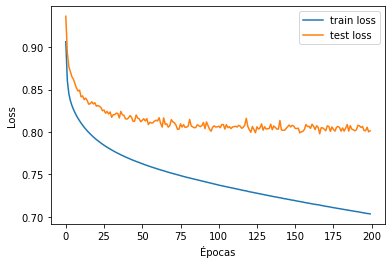

In [25]:
e = range(epocas)
plt.plot(e,loss_tr,label='train loss')
plt.plot(e,loss_ts,label='test loss')
plt.legend()
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.savefig('ej8_lossacctr.pdf')

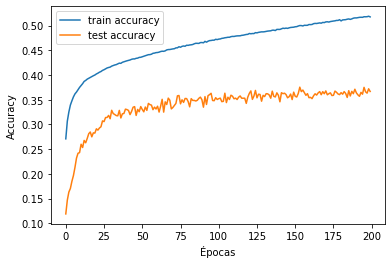

In [26]:
plt.plot(e,acc_tr,label='train accuracy')
plt.plot(e,acc_ts,label='test accuracy')
plt.legend()
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.savefig('ej8_lossaccts.pdf')

In [27]:
np.savetxt('ej8_accepochs.csv', (e,acc_ts), delimiter=',')

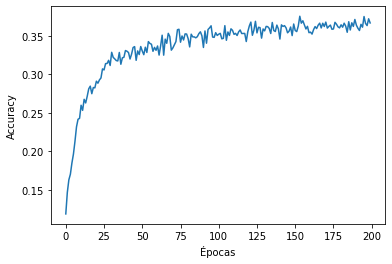

In [28]:
plt.plot(e,acc_ts)
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.savefig('ej8_lossepochtest.pdf')